In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import statsmodels.api as sm
from glm.glm import GLM
from glm.families import Gaussian, Poisson
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

#redo some of the cleaning from yesterday
cars = pd.read_csv('data/cars_multivariate.csv', na_values=['?']).dropna()

cars['origin'] = cars['origin'].astype(str)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<h1>From the intro...</h1>


In [2]:
# Create a linear regression object
X = cars['weight']
X = sm.add_constant(X)
y = cars['mpg']

regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          6.02e-102
Time:                        14:11:14   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

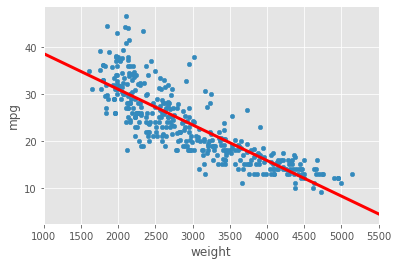

In [3]:
# Plot the line along with the data
slope = -.0076
intercept = 46.2165
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
_ = ax.set_xlim([1000,5500])

<h2>Model Troubleshooting</h2>
Of course, our linear model is still pretty poor.  Let's see if we can't do a little better by thinking abou the assumptions of linear regression.

<h2>Problem 1 - Linear Relationship</h2>
<p>We can probably see there are some problems with our fit...
</p>

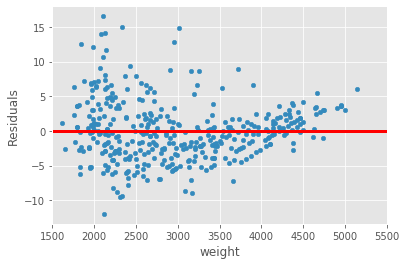

In [4]:
X["y_hat"] = regressor.predict(X)
X["Residuals"] = y - X["y_hat"]
# Plot the line along with the data
ax = X.plot('weight','Residuals',kind='scatter')
ax.plot(xx, [0]*100, color='red', lw=3)
_ = ax.set_xlim([1500,5500])

<details>
<summary>
What's your first thought to fix the poor quality of the fit?
</summary>
Linear regression assumes a linear relationship, with residuals that are i.i.d. and normally distributed. While there is clearly a negative slope, we can visually detect a curvature in the relationship.  The naive approach for a non-linear relationship, bringing in higher orders of weight.  Before we start this fit, which degree polynomial should we expect to fit to this distribution?
</details>

In [5]:
X_sq = pd.DataFrame({'weight' : cars['weight'], 'weight_sq' : cars['weight']**2})
X_sq = sm.add_constant(X_sq)

reg_sq = sm.OLS(y, X_sq).fit()
reg_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     488.3
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          8.39e-107
Time:                        14:11:15   Log-Likelihood:                -1115.1
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     389   BIC:                             2248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.2555      2.993     20.800      0.000      56.371      68.140
weight        -0.0185      0.002     -9.379      0.000      -0.022      -0.015
weight_sq   1.697e-06   3.06e-07      5.545      0.000     1.1e-06     2.3e-06
==============================================================================
Omnibus:                       53.804   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.923
Skew:                           0.809   Prob(JB):                     4.03e-21
Kurtosis:                       4.770   Cond. No.                     1.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

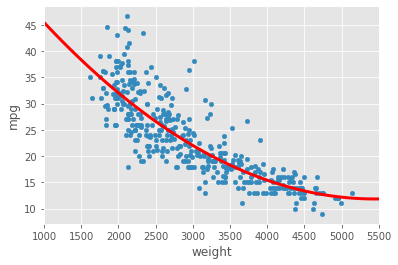

In [6]:
# Plot the line along with the data
slope = -.0185
slope_sq = 1.697e-6
intercept = 62.255
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*xx*slope_sq + xx*slope + intercept, color='red', lw=3)
_ = ax.set_xlim([1000,5500])

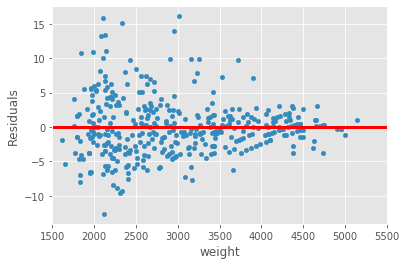

In [7]:
X_sq["y_hat"] = reg_sq.predict(X_sq)
X_sq["Residuals"] = y - X_sq["y_hat"]
# Plot the line along with the data
ax = X_sq.plot('weight','Residuals',kind='scatter')
ax.plot(xx, [0]*100, color='red', lw=3)
_ = ax.set_xlim([1500,5500])

<h2>Problem 2 - Non-uniform residuals</h2>
<p>The above fit has problem that was also present in the original fit - the residuals are not uniform from region to region..  We can look at what the variance is for the left and right side of the distribution.  The eye test allows us to observe that the variance is not equal throughout the distribution.  This violates a key assumption of linear regression, <b>Homoscedasticity</b>.  In order to fix this, we can transform the response variable y to a different scale.</p>

In [8]:
high_var, low_var = (np.var(X[X['weight']>3000]['Residuals']), np.var(X[X['weight']<3000]['Residuals']))

print("High var: {0:.3f}, low var: {1:.3f}, ratio: {2:.3f}".format(high_var, low_var, low_var/high_var))

High var: 10.811, low var: 24.485, ratio: 2.265


<p>So there is less variance for heavier cars.  This makes sense as the numbers get lower, but for the purpose of having a well behaved line of best fit, it makes sense to try to find a different reprsentation of our variables.</p>

In [9]:
#Create new variable
cars["mpg_log"] = np.log(cars["mpg"])

# Choose the predictor and add a constant term
# (allow for an intercept)
X2 = pd.DataFrame({'weight' : cars['weight']})
X2 = sm.add_constant(X2)
y2 = cars['mpg_log']

# Create a linear regression object
log_reg = sm.OLS(y2,X2)
log_reg = log_reg.fit()
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mpg_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1282.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          2.39e-125
Time:                        14:11:15   Log-Likelihood:                 152.45
No. Observations:                 392   AIC:                            -300.9
Df Residuals:                     390   BIC:                            -293.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1421      0.030    136.660      0.000       4.083       4.202
weight        -0.0004   9.79e-06    -35.808      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        5.551   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                6.181
Skew:                           0.172   Prob(JB):                       0.0455
Kurtosis:                       3.511   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

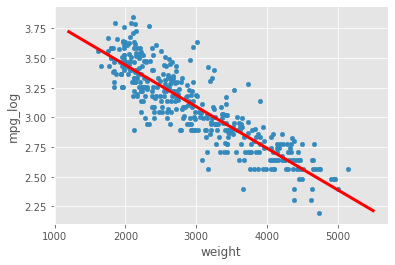

In [10]:
ax = cars.plot('weight','mpg_log',kind='scatter')
xx = np.linspace(1200, 5500, 100)
_ = ax.plot(xx, xx*(log_reg.params.weight) + log_reg.params.const, color='red', lw=3)
#ax.set_xlim([1000,5500])

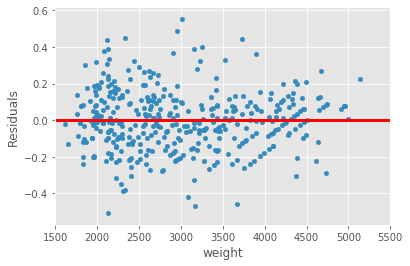

In [11]:
X2["y_hat"] = log_reg.predict(X2)
X2["Residuals"] = y2 - X2["y_hat"]
# Plot the line along with the data
ax = X2.plot('weight','Residuals',kind='scatter')
ax.plot(xx, [0]*100, color='red', lw=3)
_ = ax.set_xlim([1500,5500])

In [12]:
high_var, low_var = (np.var(X2[X2['weight']>3000]['Residuals']), np.var(X2[X2['weight']<3000]['Residuals']))

print("High var: {0:.3f}, low var: {1:.3f}, ratio: {2:.3f}".format(high_var, low_var, low_var/high_var))

High var: 0.025, low var: 0.028, ratio: 1.129


### An Alternative Approach

In [13]:
X_data = X[['const', 'weight']]

poisson_model = GLM(family=Poisson())
poisson_model.fit(X_data.values, y.values)

print("Coefficients: \n", poisson_model.coef_)
print("P-values: \n", poisson_model.p_values_)


poisson_model.summary()

Coefficients: 
 [ 4.17621223e+00 -3.57638273e-04]
P-values: 
 [0.00000000e+000 1.00817377e-152]
Poisson GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                  4.18            0.04
X1                        -0.00            0.00


In [14]:
# R^2 from above was .767
1 - np.sum((poisson_model.predict(X_data.values) - y.values)**2)/(len(y)*np.var(y.values))

0.7138405275973975

<h2>Aside - Higher Order Polynomials vs. Response Variable Transformation</h2>
<p>
If we were to plot an exponential vs. a polynomial, they would have very different apperances.
</p>

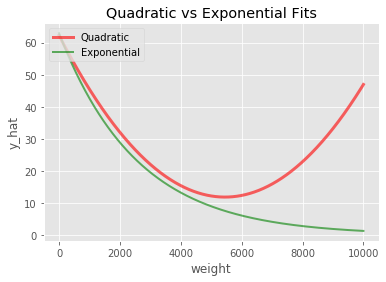

In [15]:
def quad(x):
    return 62.25 - 0.0185*x + 1.697e-6*x*x

def e_fit(x):
    return np.exp(4.1421 -0.00039*x)

x = np.linspace(0, 10000, 1000)
y_q = quad(x)
y_e = e_fit(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y_q, 'r-', lw=3, alpha=0.6, label='Quadratic')
ax.plot(x, y_e, 'g-', lw=2, alpha=0.6, label='Exponential')
ax.set_title("Quadratic vs Exponential Fits")
ax.set_ylabel("y_hat")
ax.set_xlabel("weight")
ax.legend(loc='upper left')
plt.show()

<details>
<summary>
Which of these distributions is the 'true' distribution?
</summary>
The exponential distribution is the better fit.  How do we know this?  We know because the limits are correct.  As the car gets heavier and heavier, it will take more and more energy to move it.  The exponential also does not go negative, unlike higher order polynomials.
</details>

<details>
<summary>
Given the 'true' value, which one should we use?
</summary>
We originally introduced response variable transformation as a mechanism for dealing with unequal variance, however, doing such transformations could make it tricky to implement multiple regression (introduced later).  Is there any reason to trust our quadratic fit?  Yes, and the reason is the locality of the feature variables means  
</details>

<h2>Problem 3 - Non-Normality of Residuals</h2>
<p>The <b>normality of residuals</b> is an embedded within OLS.  Failure to satisfy this condition doesn't nessisarily invalidate the model, however, it may mean that other models such as <a href="https://onlinecourses.science.psu.edu/stat501/node/398">Generalized Least Squares (GLS)</a> is a better fit.  The way we test for the normailty of the distribution is through a <a href="http://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot.html">QQ plot</a>.</p>

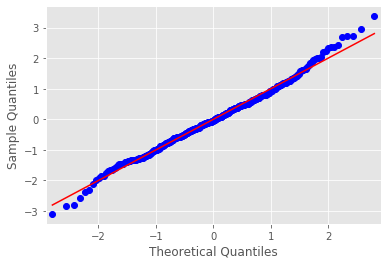

In [16]:
_ = sm.qqplot(X2["Residuals"], line='s', fit=True)

<p>Here, we can see we have quite good compliance with the data.  Let's look at what it looked like on the linear fit</p>

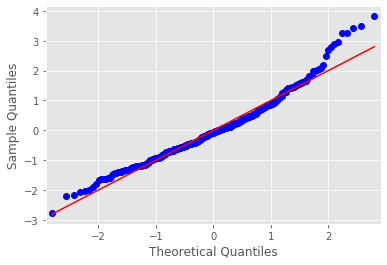

In [17]:
_ = sm.qqplot(X["Residuals"], line='s', fit=True)

<h2>Problem 4 - Outliers and high leverage points</h2>
<p>When we fit data, the function we minimize is the RSS.  This means that points that have a greater offset from the expectation value at any given point have a more prounced effect on the shape of the fit.  Let's reexamine our original fit plot.  Just using the eyeball method, it can be difficult to tell which points are outliers.  Here, we prefer to "studentize" our residuals.</p>

Estimated standard error:  4.3216451262707


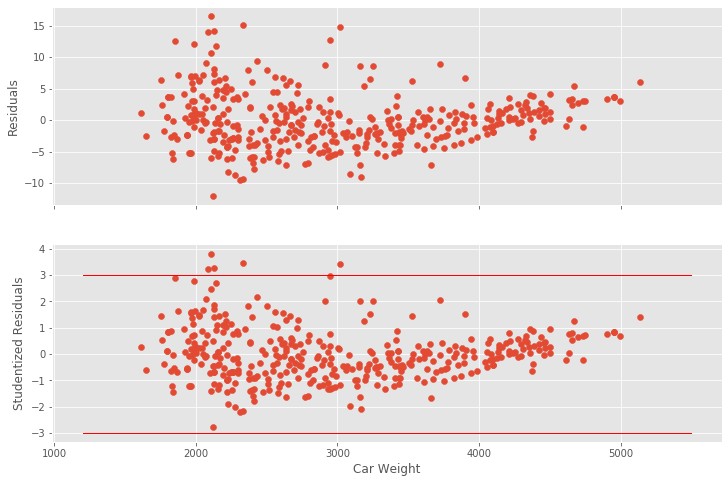

In [18]:
# Plot the line along with the data
f, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].scatter(X['weight'], X['Residuals'])
ax[0].set_ylabel('Residuals')

est_std = np.std(X['Residuals'])
print("Estimated standard error: ", est_std)
X['Studentized Res.'] = X['Residuals']/est_std

ax[1].scatter(X['weight'], X['Studentized Res.'])
ax[1].plot(xx, [3]*100, color='red', lw=1)
ax[1].plot(xx, [-3]*100, color='red', lw=1)
ax[1].set_xlabel('Car Weight')
ax[1].set_ylabel('Studentized Residuals')
fig.show()

<h2>Leverage</h2>
<p>Outliers may indicate an error in the data, or that our model needs additional information to be effective.  The degree to which a variable can cause our model fit to be incorrect depends on it's <b>leverage</b>, which we define to be:</p>
$$h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{j}^{n}(x_j-\bar{x})^2}$$

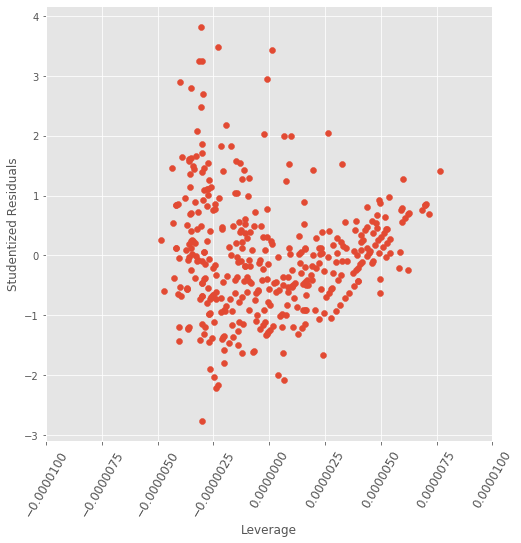

In [19]:
#Create leverage column
X['ave_weight'] = np.mean(X['weight'])
X['weight_centered'] = X['weight'] - X['ave_weight']
X['sq_centered'] = X['weight_centered']*X['weight_centered']
ss_wc = np.sum(X['sq_centered'])
X['leverage'] = X['weight_centered']/ss_wc

#plot
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(X['leverage'],X['Studentized Res.'])
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_xlim(-.00001, .00001)
#ax.xticks(x, labels, rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=12, rotation=60)

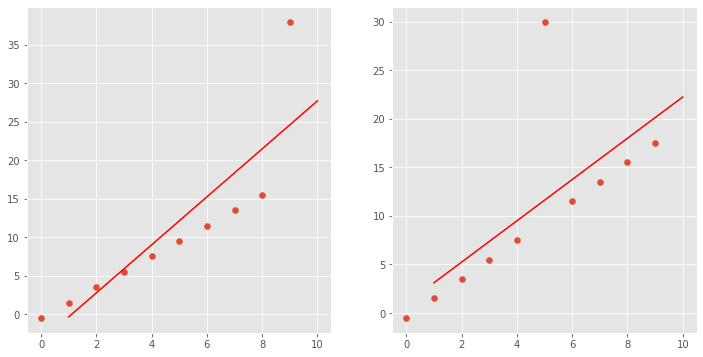

In [20]:
def my_line(x):
    return x*2-.5

def my_outlier(x):
    return x*2+20

toy_data_X = sm.add_constant(np.arange(10))
td_y1 = np.array([my_line(x) for x in toy_data_X[:9, 1]]+[my_outlier(toy_data_X[9, 1])])
td_y2 = np.array([my_line(x) for x in toy_data_X[:5, 1]]+[my_outlier(toy_data_X[5, 1])]+[my_line(x) for x in toy_data_X[6:, 1]])

toy_reg1 = sm.OLS(td_y1,toy_data_X)
toy_reg1 =toy_reg1.fit()

toy_reg2 = sm.OLS(td_y2,toy_data_X)
toy_reg2 = toy_reg2.fit()

t_lin_X = sm.add_constant(np.linspace(1, 10))

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(toy_data_X[:,1], td_y1)
ax[0].plot(t_lin_X[:,1], toy_reg1.predict(t_lin_X), color='r')
ax[1].scatter(toy_data_X[:,1], td_y2)
ax[1].plot(t_lin_X[:,1], toy_reg2.predict(t_lin_X), color='r')
fig.show()

In [21]:
toy_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     23.33
Date:                Tue, 17 Sep 2019   Prob (F-statistic):            0.00130
Time:                        14:11:18   Log-Likelihood:                -30.762
No. Observations:                  10   AIC:                             65.52
Df Residuals:                       8   BIC:                             66.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4818      3.446     -1.010      0.342     -11.429       4.466
x1             3.1182      0.646      4.830      0.001       1.629       4.607
==============================================================================
Omnibus:                       10.183   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.392
Skew:                           1.421   Prob(JB):                        0.111
Kurtosis:                       4.569   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
toy_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     7.901
Date:                Tue, 17 Sep 2019   Prob (F-statistic):             0.0228
Time:                        14:11:18   Log-Likelihood:                -32.337
No. Observations:                  10   AIC:                             68.67
Df Residuals:                       8   BIC:                             69.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9909      4.035      0.246      0.812      -8.313      10.295
x1             2.1242      0.756      2.811      0.023       0.382       3.867
==============================================================================
Omnibus:                       28.304   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.366
Skew:                           2.650   Prob(JB):                     1.39e-05
Kurtosis:                       8.059   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Multiple Linear Regression</h1>
<p>We now turn to the concept of multiple linear regression.  Intuitively, the concept behind this is that multiple features will often have an effect on a response variable.</p>

In [23]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,mpg_log
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,2.890372
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,2.708050
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,2.890372
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,2.772589
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,2.833213


In [24]:
# Choose the predictor and add a constant term
# (allow for an intercept)
X_mult = cars.drop(columns=['car_name', 'origin', 'mpg', 'mpg_log'])
X_mult = sm.add_constant(X_mult)
y = cars['mpg']

# Create a linear regression object
m_reg1 = sm.OLS(y,X_mult)
m_reg1 = m_reg1.fit()
m_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          3.79e-135
Time:                        14:11:18   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
model            0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Are all are parameters useful?</h3>

<details>
<summary>
Let's break down what we're seeing.  Accelleration, displacement, and cylinders are all thing I would Naively assume would have an effect, why don't their P-Values reflect this?
</summary>
Many of the features have a predictable (linear or inverse) relationship with weight.  This effect is call <strong>multiple colinearity</strong>.  These variables typically don't effect the model performance (i.e. $R^2$) however, it make model interpretability more difficult and the model parameters become instable.  As such, we aspire to have the simplest viable model, so we will look to identify redundant parameters.
</details>

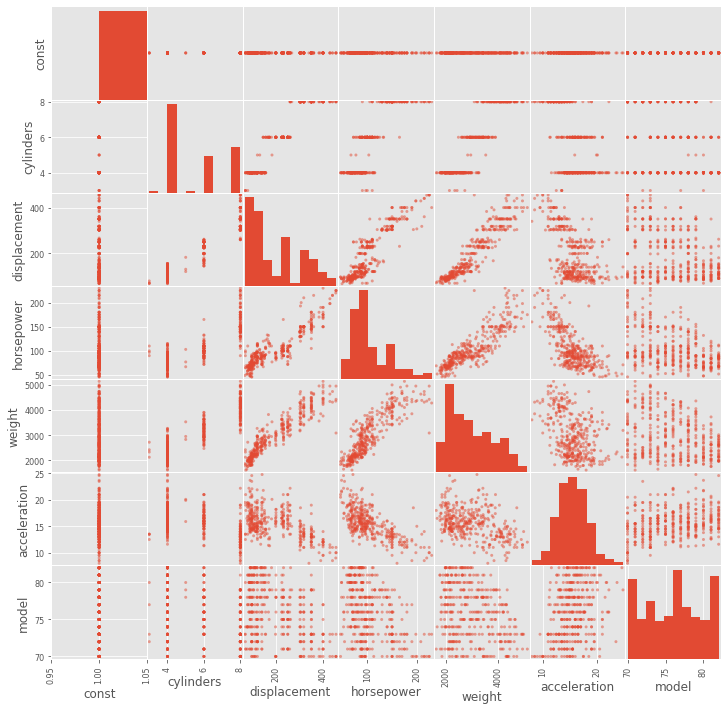

In [25]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(X_mult, figsize=(12, 12))

<h2>Problem 5 - Multiple Colllinearity</h2>
<p>Let's build a model that takes out those dependencies.</p>

In [26]:
# Choose the predictor and add a constant term
# (allow for an intercept)
X_mult = cars.drop(columns=['car_name', 'origin', 'mpg', 'mpg_log', \
                       'horsepower', 'displacement', 'acceleration', 'cylinders'])
X_mult = sm.add_constant(X_mult)
y = cars['mpg']

# Create a linear regression object
m_reg2 = sm.OLS(y,X_mult)
m_reg2 = m_reg2.fit()
m_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          3.33e-140
Time:                        14:11:22   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model          0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p>And one for our transformed variable set</p>

In [27]:
# Choose the predictor and add a constant term
# (allow for an intercept)
X_mult = cars.drop(columns=['car_name', 'origin', 'mpg', 'mpg_log', \
                       'horsepower', 'displacement', 'acceleration', 'cylinders'])
X_mult = sm.add_constant(X_mult)
y = cars['mpg_log']

# Create a linear regression object
m_log_reg = sm.OLS(y,X_mult)
m_log_reg = m_log_reg.fit()
m_log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mpg_log   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1310.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          1.59e-173
Time:                        14:11:22   Log-Likelihood:                 268.08
No. Observations:                 392   AIC:                            -530.2
Df Residuals:                     389   BIC:                            -518.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6397      0.143     11.442      0.000       1.358       1.921
weight        -0.0003   7.67e-06    -40.212      0.000      -0.000      -0.000
model          0.0313      0.002     17.683      0.000       0.028       0.035
==============================================================================
Omnibus:                        7.706   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               11.581
Skew:                          -0.096   Prob(JB):                      0.00306
Kurtosis:                       3.820   Cond. No.                     7.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p>We can see that there is actually a <b>very small</b> drop in performance from <code>m_reg1</code> to <code>m_reg2</code>.  We can pretty easily say that the change is merited, however, it would be nice to have a systematic way of determining if a change in model performance is worth the added complexity.
</p>

<h2>F-Testing Models</h2>
<p>An F-Test is any test using the <b>Fisher–Snedecor distribution</b>.  There are several applications of the F-Test, perhaps the most useful are the comparisons of embedded models.  <a href="https://en.wikipedia.org/wiki/F-test#Regression_problems">This Wikipedia</a> entry has a nice explanation of the F-Test for regression analysis.  In short, we can compare embeded models (note, the article has swapped model 1 and 2 from my settup) to create an F-statistic that will tell us if the added model complexity is warrented.
</p>

In [28]:
def f_statistic(rss1, n_pars_1, rss2, n_pars_2, n_obs):
    '''
    f_statistic:
    Compute the f_statistic for two regression models, where model 1 has a subset of 
    parameters of model 2.  The models should be built on the same set of data.
    
    Parameters:
    rss1 (float [0-1]): The RSS value of regression model 1
    n_pars_1 (int > 0): The number of parameters in model 1
    rss2 (float [0-1]): The RSS value of regression model 2
    n_pars_2 (int > n_pars_1): The number of parameters in model 2
    n_obs (int > n_pars_2): The number of observations used to build models 1 & 2
    '''
    if n_pars_2 <= n_pars_1:
        raise ValueError("Parameter set 1 must be a subset of parameter set 2")
    
    print("DOF: ({}, {})".format(n_pars_2-n_pars_1, n_obs-n_pars_2))
    
    return ((rss1-rss2)/(n_pars_2-n_pars_1))/((rss2)/(n_obs-n_pars_2))

In [29]:
f_statistic(sum(m_reg2.resid**2), len(m_reg2.params),  
            sum(m_reg1.resid**2), len(m_reg1.params),  
            m_reg1.nobs)

DOF: (4, 385.0)


0.5424377353979624

<p>We can compare this statistic to an <a href="http://www.socr.ucla.edu/applets.dir/f_table.html">F-Table</a> ( with (n_pars2−n_pars1, n_obs−n_pars2) degrees of freedom), and determine if it is statistically significant.  The provided table has the statistic around 2.8, so we fail to reject the null hypothesis that the improvements to the model due to the added complexity cannot be accounted for by random fluctuations (i.e. the more complex model does not represent a statistically significant improvement).</p>